# Student Grade Prediction using LinearRegression

Github- Justinthedataboy

# Imports 

In [21]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings 
from sklearn.metrics import mean_absolute_error

# Dataset Description

This is a sample dataset gotten off kaggle showing the

 * Hours: The hours the student takes to study/ Hours of Study
 * Scores: This is th scores related to that from 0 to 100/ score of the student ranging from 0 to 100


# Aim

The aim of the project is as follows;
 * Provide exploratory data analysis (EDA) inorder to know which variables to use for our model and give insights tha will help to improve the students performance 
   
 * To predict the score of a student who studies for 9.25 hours per day

 * The Algorithm will predict the marks a student is expected to score based on the number of hours they studied

 * Give an Analysis on how many student pass and fail

# Load the dataset

In [22]:
data = pd.read_csv('student_scores.csv') #load dataset 

In [23]:
print('loaded dataset')
data

loaded dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Analyze the data

In [24]:
data.shape

(25, 2)

 There are 25 rows and 2 columns in the dataset 

In [25]:
data.columns # display the column names in the dataset

Index(['Hours', 'Scores'], dtype='object')

In [26]:
data.info() #Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
 data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [29]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


From the above there are No null values so no need to remove outliers 

## Data Visualization

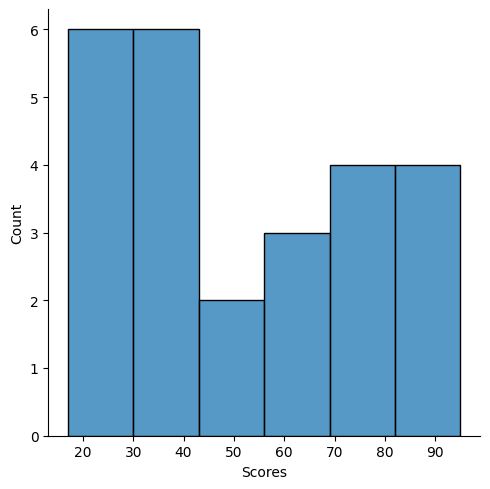

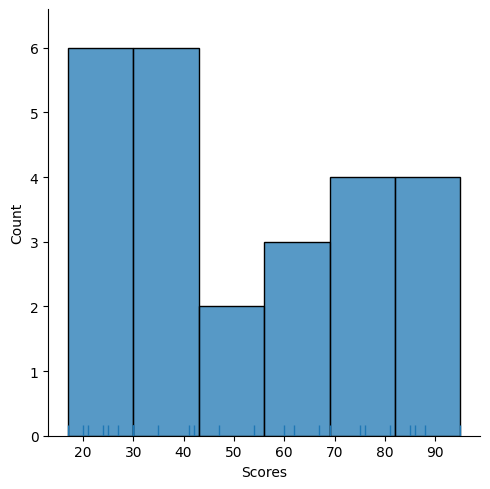

In [30]:
sns.displot(data["Scores"])
plt.show()

sns.displot(data["Scores"], kde=False, rug=True)
plt.show()

The purpose of the distribution plot is to depict the variation in dataset 

## scatterplot to show joint between scores and hours 

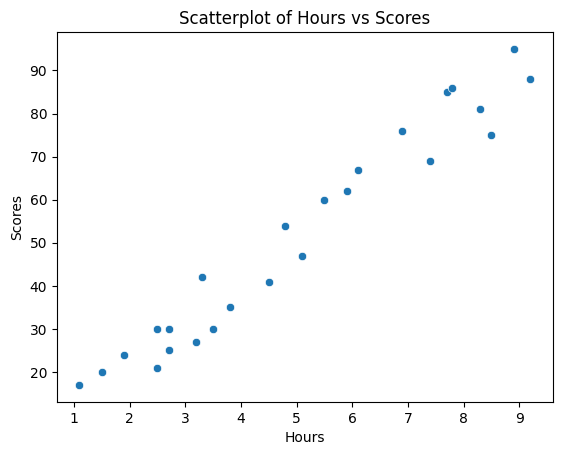

In [31]:
sns.scatterplot(x="Hours", y="Scores",  data=data, )
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatterplot of Hours vs Scores')
plt.show()

## Visualizing how much scores and hours are correlated

regression plot is used to plot data on a linear regression modeThe sraight line represent the linear correlation beween hour and score

scores on the y axis is the dependent vaiable because its value depends on how many hours a student studied which is x


Text(0.5, 1.0, 'plotting the regression line')

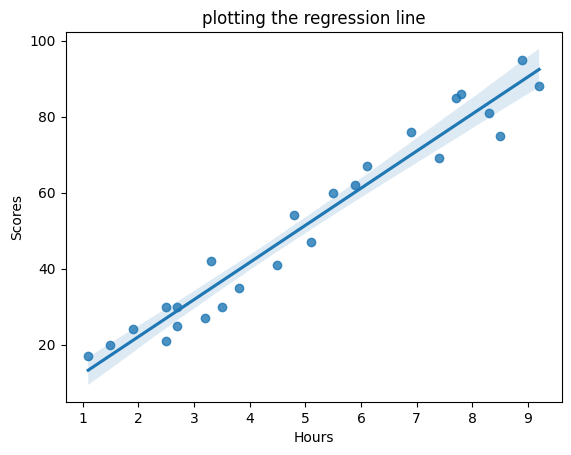

In [32]:
sns.regplot(x="Hours", y="Scores",  data=data, )
plt.title('plotting the regression line')

From the above analysis we come to a conclusion that scores and hours are strongly correlated

# Machine Learning

## Using Simple linear regression to predict the dataa as we only have two columns 

In [33]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


We'll follow the convention of using `X_train`, `X_test`, `y_train`, and `y_test`:

1. **X_train**: This is a set of data containing information about the number of hours students have studied. Each row in `X_train` represents a student, and the column "hours of study" contains the number of hours that student has studied. This set is used to train the model.

2. **X_test**: This is another set of data with the same structure as `X_train`, but it contains information about a different group of students. The column "hours of study" in `X_test` contains the number of hours these students have studied. This set is not seen by the model during training and is used to test the model's predictions.

3. **y_train**: This is a set of data containing the corresponding student grades for the students in `X_train`. The column "scores" in `y_train` contains the grades of the students. Each row in `y_train` corresponds to a student in `X_train`. The model uses this information during training to learn the relationship between hours of study and student grades.

4. **y_test**: Similar to `y_train`, this is a set of data containing the actual grades for the students in `X_test`. The model's predictions on `X_test` are compared with the actual grades in `y_test` to evaluate how well the model performs on new, unseen data.

In summary, `X_train` and `y_train` are used to teach the model the relationship between hours of study and student grades. `X_test` and `y_test` are then used to check how well the model can predict grades for new students based on their hours of study, helping you understand how well the model generalizes to unseen data.

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
results = regressor.fit(X_train, y_train) 

In [35]:
results.coef_, results.intercept_

(array([9.78856669]), 2.370815382341881)

# Comparing actual value vs Predicted value 

In [36]:
data['Predicted Scores'] = results.predict(data['Hours'].values.reshape(-1, 1))

data.head(5)

,Hours,Scores,Predicted Scores
0,2.5,21,26.842232
1,5.1,47,52.292505
2,3.2,27,33.694229
3,8.5,75,85.573632
4,3.5,30,36.630799


## Visualizing Actual scores and Predicted scores

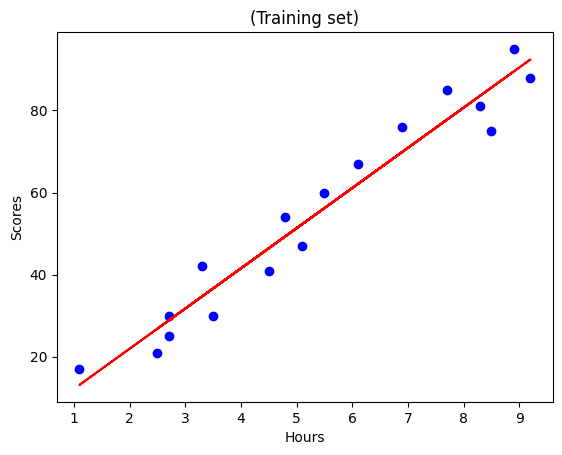

In [37]:
#Plotting the training set 
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('(Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


Calculating the coefficients of the simple linear regression equation: y=C0+C1.x(C1:Is the slope, C0: is the intercept)

In [38]:
mean_absolute_error(data['Scores'], data['Predicted Scores'])

4.982315081106277

In [39]:
data = data.sort_values(by=['Hours'])

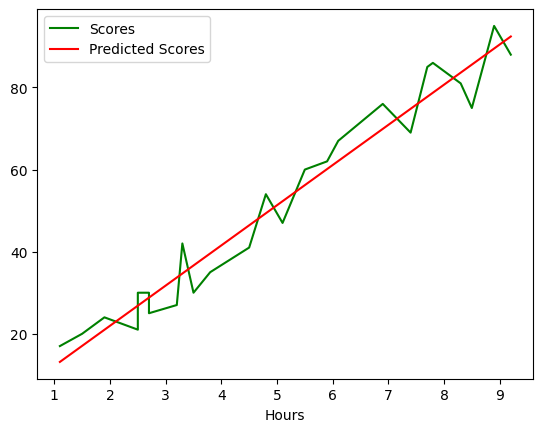

In [40]:
ax = plt.gca()
data.plot(kind='line', x='Hours', y='Scores', color='green', ax = ax)
data.plot(kind='line', x='Hours', y='Predicted Scores', color='red', ax=ax)
plt.show()

In [41]:
data.sample(20)

,Hours,Scores,Predicted Scores
11,5.9,62,60.123359
0,2.5,21,26.842232
23,6.9,76,69.911926
20,2.7,30,28.799945
13,3.3,42,34.673085
9,2.7,25,28.799945
12,4.5,41,46.419365
10,7.7,85,77.742779
14,1.1,17,13.138239
16,2.5,30,26.842232


From the above we can see that a student who studies for 9.2 hours scores 88